# Lab 3: Captura de Imagem e Vídeo

Este notebook apresenta a implementação de comandos de entrada e saída de imagens. O objetivo é conhecer os comandos para visualizar e gravar imagens e videos com o OpenCV.

**Equipe:**

Allan Hirose Pires de Souza

Juliana dos Santos Silva

Kaike Nascimento Souza

- Data de realização dos experimentos:
- Data de publicação do relatório:

**Introdução**

Captura e exibição de imagens são conceitos fundamentais no processamento digital de imagens e na visão computacional. A captura ou aquisição da imagem ocorre por meio de dispositivos como câmeras, scanners ou sensores, convertendo informações visuais em dados digitais. Já a saída, corresponde à exibição, armazenamento ou transmissão dessas imagens após processamento. Esse fluxo permite aplicar técnicas como filtragem, segmentação e reconhecimento de padrões. Assim, sistemas de entrada e saída são essenciais para aplicações que vão desde diagnóstico médico até inteligência artificial e multimídia.


**Procedimentos experimentais**

Os blocos de código abaixo utilizam bibliotecas do python para aquisição e exibição ou gravação de imagens.  


In [1]:
#Importação de bibliotecas
import numpy as np
from __future__ import print_function
import cv2 as cv
import argparse
from skimage import io
import time

**PARTE 1:** Processamento Básico nas Imagens e Vídeos.

(A) Leitura de imagem em arquivo: O código abaixo realiza a leitura de uma imagem gravada num arquivo e mostra a imagem numa janela. Além disso, o programa permite salvar a imagem em arquivo.

Responda: por que a janela aberta não mostra a imagem colorida?

In [ ]:
img = cv.imread('messi5.jpg',0)
cv.imshow('image',img)
k = cv.waitKey(0)
if k == 27:         # wait for ESC key to exit
    cv.destroyAllWindows()
elif k == ord('s'): # wait for 's' key to save and exit
    cv.imwrite('messigray.png',img)
    cv.destroyAllWindows()

Resposta: A imagem aparece em cinza por conta do comando abaixo:

img = cv.imread('messi5.jpg', 0)

O parâmetro 0 deixa a imagem em escalas de cinza. Se colocarmos o parâmetro 1, a imagem é exibida nas cores originais.

(B) Leitura de vídeo em arquivo: O código abaixo realiza a leitura de video gravado num arquivo e exibe a sequencia das imagems numa janela.

Altere: modifique o programa para que as imagens sejam exibidas mais rápidamente e depois para que sejam exibidas mais lentamente.

Responda: qual a explicação de alteração de velocidade de exibição, e apresente suas soluções detalhadamente.

In [ ]:
cap = cv.VideoCapture('big_buck_bunny.mp4')

while(cap.isOpened()):
    ret, frame = cap.read()

    if ret==True:
        # show the frame
        cv.imshow('frame',frame)

        #wait next frame by 40ms - 25fps
        time.sleep(1/25.0)

        if cv.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

cap.release()
cv.destroyAllWindows()

Resposta: Para alterarmos a velocidade de exibição, temos que modificar time.sleep().

**Mais rápido**

In [ ]:
cap = cv.VideoCapture('big_buck_bunny.mp4')

while(cap.isOpened()):
    ret, frame = cap.read()

    if ret==True:
        # show the frame
        cv.imshow('frame',frame)

        #wait next frame by 40ms - 25fps
        time.sleep(1/100.0)

        if cv.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

cap.release()
cv.destroyAllWindows()

time.sleep(1/100.0) significa 100 quadros por segundo, fazendo com que o tempo de espera entre um quadro e outro seja menor, aumentando a velocidade do vídeo.

**Mais** **lento**

In [ ]:
import time
import numpy as np
import cv2 as cv

cap = cv.VideoCapture('big_buck_bunny.mp4')

while(cap.isOpened()):
    ret, frame = cap.read()

    if ret==True:
        # show the frame
        cv.imshow('frame',frame)

        #wait next frame by 40ms - 25fps
        time.sleep(1/5.0)

        if cv.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

cap.release()
cv.destroyAllWindows()

time.sleep(1/5.0) significa 5 quadros por segundo, fazendo com que o tempo de espera entre um quadro e outro seja maior, diminuindo a velocidade do vídeo.

(C) Leitura de imagem de câmera: O programa abaixo realiza a leitura de imagens da camera instalada no computador e exibe a sequencia das imagems amostradas em uma janela. Execute e verifique o resultado:

Altere: modifique o programa para que uma imagem da câmera seja salva num arquivo “foto1.png” no momento em que for clicada a tecla ‘x’ no teclado. Apresente o resultado e sua solução detalhadamente.

In [ ]:
cap = cv.VideoCapture(0)

if not cap.isOpened():
    print("Cannot open camera")
    exit()

while True:
    ret, frame = cap.read()

    if not ret:
        print("Can't receive frame. Exiting ...")
        break

    cv.imshow('frame', frame)

    # Captura a tecla pressionada
    key = cv.waitKey(1)

    # Se a tecla for 'q', fecha o programa
    if key == ord('q'):
        break

    # Se a tecla for 'x', salva o frame atual como imagem
    elif key == ord('x'):
        cv.imwrite('foto1.png', frame)
        print("Imagem salva como foto1.png!")

cap.release()
cv.destroyAllWindows()

Solução: Digitamos o seguinte comando:

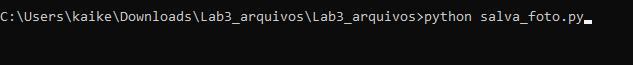


A webcam começa a captar a imagem. Quando clicamos em "x", o arquivo sinalizado abaixo é gerado.

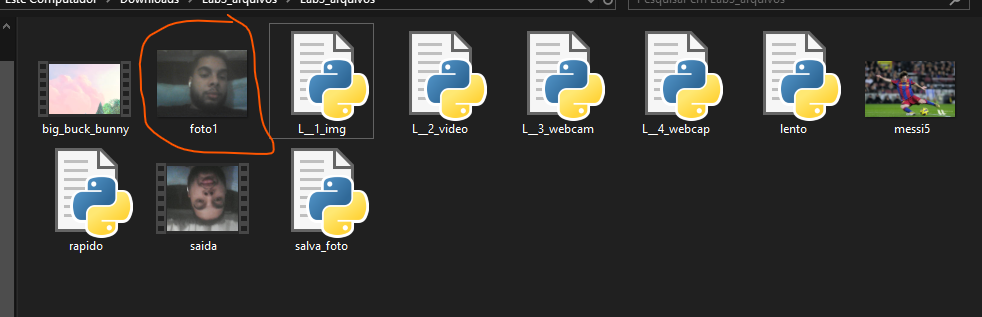

(D) Gravação de vídeo da câmera: O código abaixo realiza a leitura de imagens da câmera, exibe a sequência de imagens numa nova janela, e ao digitar a tecla “q” salva toda a sequência de imagens num arquivo “saida.avi” no formato AVI de vídeo. Execute e verifique o resultado:

Altere: modifique o programa para que as imagens gravadas estejam “normais” no arquivo de video salvo, e apresentem uma velocidade de exibição adequada. Apresente o resultado e sua solução detalhadamente.

Solução: No código original, a linha frame = cv.flip(frame, 0) era executada antes de gravar o arquivo.

O comando cv.flip(frame, 0) inverte a imagem no eixo X (deixa de ponta-cabeça).

Ao remover essa linha, o frame capturado pela câmera é enviado diretamente para o arquivo out.write(frame) e para a tela na orientação original.

Em relação a velocidade de exibição, fps = 10.0 é considerado baixo para vídeos de webcam, o que deixa a gravação lenta. Portanto, alteramos para fps = 20.0, que tornou a velocidade de exibição mais adequada. Abaixo está o código com as modificações.

In [ ]:
cap = cv.VideoCapture(0)


width = cap.get(cv.CAP_PROP_FRAME_WIDTH)
height = cap.get(cv.CAP_PROP_FRAME_HEIGHT)


fps = 20.0

fourcc = cv.VideoWriter_fourcc(*'XVID')
out = cv.VideoWriter('saida.avi', fourcc, fps, (int(width), int(height)))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break





    out.write(frame)
    cv.imshow('frame', frame)

    if cv.waitKey(1) == ord('q'):
        break

cap.release()
out.release()
cv.destroyAllWindows()

 Responda: se for necessário alterar a imagem, ou seja realizando alguma operação de procesamento nela, em que ponto dos quatro programas estudados isso deve ser realizado?
 
O processamento deve ser realizado após a captura/leitura do frame para a memória e antes de qualquer comando de saída (exibição ou gravação).

**PARTE 2:** Obtenção de Fotos e Vídeos.

a) Obter com a webcam uma foto geral com TODOS os integrantes da EQUIPE, sendo que cada um deve usar uma roupa de cor diferente, melhor se for com as cores Vermelho, Verde e Azul destacadas. Cuidem para a iluminação ficar boa. Podem usar qualquer editor de imagem caso necessitem “Compor” as fotos individuais para formar a foto geral.

Programa para captura da foto:

In [ ]:
cap = cv.VideoCapture(0)

if not cap.isOpened():
    print("Cannot open camera")
    exit()

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    # if frame is read correctly ret is True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break

    # Display the resulting frame
    cv.imshow('frame', frame)

    if cv.waitKey(1) == ord('x'):
        cv.imwrite("foto.jpg", frame)
        print("Imagem capturada e salva como foto.jpg")
        break

    if cv.waitKey(1) == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv.destroyAllWindows()

Imagem capturada e salva como foto.jpg


b) Façam uma foto-montagem “Avatar”, juntando todos avatares numa única imagem. Meu “Avatar” por exemplo, é o Pikachu... A ordem dos avatares deve ser a mesma da foto geral. Podem usar qualquer editor de imagem para “Compor” as fotos individuais que cada um da equipe vai fornecer.

c) Filmem com a webcam DOIS vídeos com pessoas e DOIS videos com um objeto:

i) um com mudanças lentas de movimento;

ii) e outro com mudanças rápidas de movimento.

iii) Em cada um dos vídeos os membros da equipe DEVEM ser diferentes. Podem ser apenas dois membros, um em cada vídeo, e sugiro escolherem os que possuem as melhores câmeras.


Código para a captura dos vídeos:

In [ ]:
cap = cv.VideoCapture(0)

# Get current width of frame
width = cap.get(cv.CAP_PROP_FRAME_WIDTH)   # float
# Get current height of frame
height = cap.get(cv.CAP_PROP_FRAME_HEIGHT) # float
# Define Video Frame Rate in fps
fps = 10.0

# Define the codec and create VideoWriter object
fourcc = cv.VideoWriter_fourcc(*'XVID')
out = cv.VideoWriter('saida.avi', fourcc, fps, (int(width),int(height)) )

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
#    frame = cv.flip(frame, 0)
    # write the flipped frame
    out.write(frame)
    cv.imshow('frame', frame)
    if cv.waitKey(1) == ord('q'):
        break

# Release everything if job is finished
cap.release()
out.release()
cv.destroyAllWindows()

Vídeo de objeto com mudança lenta de movimento:

In [2]:
cap = cv.VideoCapture('saida_objeto_lento.avi')

while(cap.isOpened()):
    ret, frame = cap.read()

    if ret==True:
        # show the frame
        cv.imshow('frame',frame)

        #wait next frame by 40ms - 25fps
        time.sleep(1/25.0)

        if cv.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

cap.release()
cv.destroyAllWindows()

Vídeo de objeto com mudança rápida de movimento:

In [3]:
cap = cv.VideoCapture('saida_objeto_rapida.avi')

while(cap.isOpened()):
    ret, frame = cap.read()

    if ret==True:
        # show the frame
        cv.imshow('frame',frame)

        #wait next frame by 40ms - 25fps
        time.sleep(1/25.0)

        if cv.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

cap.release()
cv.destroyAllWindows()

Vídeo de pessoa com mudança lenta de movimento:

In [4]:
cap = cv.VideoCapture('saida_pessoa_lenta.avi')

while(cap.isOpened()):
    ret, frame = cap.read()

    if ret==True:
        # show the frame
        cv.imshow('frame',frame)

        #wait next frame by 40ms - 25fps
        time.sleep(1/25.0)

        if cv.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

cap.release()
cv.destroyAllWindows()

Vídeo de pessoa com mudança rápida de movimento:

In [ ]:
cap = cv.VideoCapture('saida_pessoa_rapida.avi')

while(cap.isOpened()):
    ret, frame = cap.read()

    if ret==True:
        # show the frame
        cv.imshow('frame',frame)

        #wait next frame by 40ms - 25fps
        time.sleep(1/25.0)

        if cv.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

cap.release()
cv.destroyAllWindows()

**Análise e discussão dos estudos realizados**


Na primeira parte do relatório, analisamos os códigos dos programas fornecidos e encontramos as soluções para os problemas apresentados

Já na segunda parte, replicamos os conhecimentos adquiridos em diversas situações, contribuindo mais ainda com a construção do conhecimento sobre os temas abordados em aula.

**Conclusões**


O "Laboratório 3 – Captura de Imagem e Vídeo", foi um grande desafio para nosso grupo. Tivemos certa dificuldade no início, porém com estudo e muita prática conseguimos entender as funções de cada comando presente nos códigos. Finalizamos essa atividade com uma boa noção sobre captura e reprodução de imagens e vídeos.

**Referências consultadas e indicadas.**